In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

from graph_tool.all import *
import numpy as np
import matplotlib.pyplot as plt

from scripts.generate_network import barabasi_albert
from scripts.hrg import *
from scripts.random_attacks import *
from scripts import visualization as viz

viz.load_matplotlib()
plt = viz.plt
plt.style.use('seaborn-poster')

In [2]:
ba_random_small = pd.read_csv('../output/k=6/random_attack_edge_BA_N=8000_k=5.99975_ntimes=100.csv')
er_random_small = pd.read_csv('../output/k=6/random_attack_edge_ER_N=8000_k=5.99975_ntimes=100.csv')
hrg1_random_small = pd.read_csv('../output/k=6/random_attack_edge_HRG_1_N=8000_k=5.99975_ntimes=100.csv')
hrg2_random_small = pd.read_csv('../output/k=6/random_attack_edge_HRG_2_N=8000_k=5.99975_ntimes=100.csv')


ba_random_large = pd.read_csv('../output/k=6/random_attack_edge_BA_N=80000_k=5.999974999999999_ntimes=100.csv')
er_random_large = pd.read_csv('../output/k=6/random_attack_edge_ER_N=80000_k=5.999974999999999_ntimes=100.csv')
hrg1_random_large = pd.read_csv('../output/k=6/random_attack_edge_HRG_1_N=80000_k=5.999974999999999_ntimes=100.csv')
hrg2_random_large = pd.read_csv('../output/k=6/random_attack_edge_HRG_2_N=80000_k=5.999974999999999_ntimes=100.csv')

### Random attacks

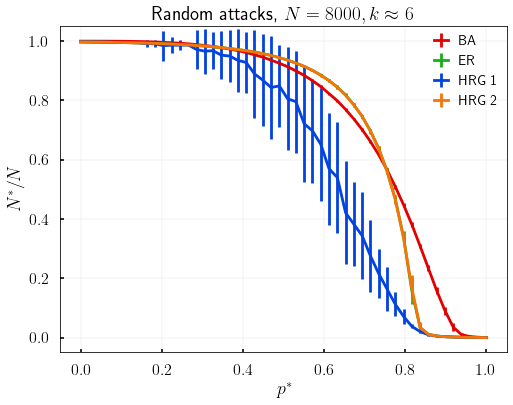

In [10]:
labels = ['BA', 'ER', 'HRG 1', 'HRG 2']
data = [ba_random_small, er_random_small, hrg1_random_small, hrg2_random_small]

plt.figure(figsize=(8, 6))
plt.grid(alpha=0.1)
viz.plot_giant_connected_component_vs_removed(data, labels)
plt.title(r'Random attacks, $N=8000, k\approx 6$')
plt.show()

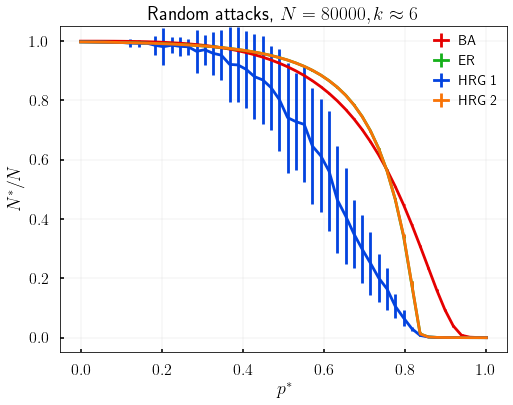

In [11]:
labels = ['BA', 'ER', 'HRG 1', 'HRG 2']
data = [ba_random_large, er_random_large, hrg1_random_large, hrg2_random_large]

plt.figure(figsize=(8, 6))
plt.grid(alpha=0.1)
viz.plot_giant_connected_component_vs_removed(data, labels)
plt.title(r'Random attacks, $N=80000, k\approx 6$')
plt.show()

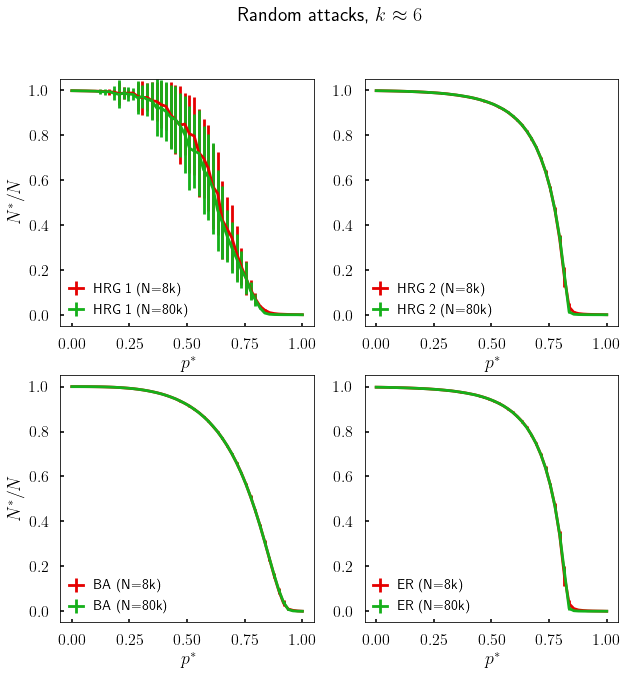

In [18]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)

labels = ['HRG 1 (N=8k)', 'HRG 1 (N=80k)']
data = [hrg1_random_small, hrg1_random_large]
viz.plot_giant_connected_component_vs_removed(data, labels, loc='lower left')

plt.subplot(2, 2, 2)
labels = ['HRG 2 (N=8k)', 'HRG 2 (N=80k)']
data = [hrg2_random_small, hrg2_random_large]
viz.plot_giant_connected_component_vs_removed(data, labels, ylabel=False)

plt.subplot(2, 2, 3)
labels = ['BA (N=8k)', 'BA (N=80k)']
data = [ba_random_small, ba_random_large]
viz.plot_giant_connected_component_vs_removed(data, labels)

plt.subplot(2, 2, 4)
labels = ['ER (N=8k)', 'ER (N=80k)']
data = [er_random_small, er_random_large]
viz.plot_giant_connected_component_vs_removed(data, labels, ylabel=False)

plt.suptitle(r'Random attacks, $k\approx 6$', fontsize=20)

plt.show()

### Intentional attacks 

In [22]:
# TODO: finish simulations on Spell
# ba_intentional_small = pd.read_csv('../output/k=6/in')
# er_intentional_small = pd.read_csv('../output/k=6/intentional_attack_edge_ER_N=8000_k=5.00075_ntimes=100.csv')
# hrg1_intentional_small = pd.read_csv('../output/k=6/intentional_attack_edge_HRG_N=8000_k=5.00075_ntimes=100.csv')
# hrg2_intentional_small = pd.read_csv('../output/k=6/intentional_attack_edge_HRG_N=8000_k=5.00075_ntimes=100.csv')


ba_intentional_large = pd.read_csv('../output/k=6/intentional_attack_edge_BA_N=80000_k=5.999974999999999_ntimes=100.csv')
er_intentional_large = pd.read_csv('../output/k=6/intentional_attack_edge_ER_N=80000_k=5.999974999999999_ntimes=100.csv')
# hrg1_intentional_large = pd.read_csv('../output/k=6/intentional_attack_edge_HRG_N=80000_k=5.000075_ntimes=100.csv')
# hrg2_intentional_large = pd.read_csv('../output/k=6/intentional_attack_edge_HRG_N=80000_k=5.000075_ntimes=100.csv')

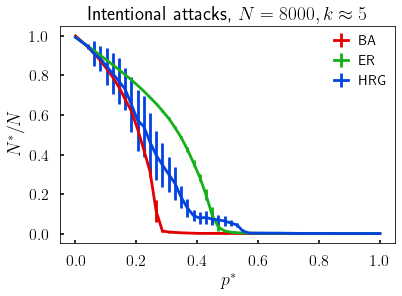

In [43]:
labels = ['BA', 'ER', 'HRG']
data = [ba_intentional_small, er_intentional_small, hrg_intentional_small]

viz.plot_giant_connected_component_vs_removed(data, labels)
plt.title(r'Intentional attacks, $N=8000, k\approx 6$')
plt.show()

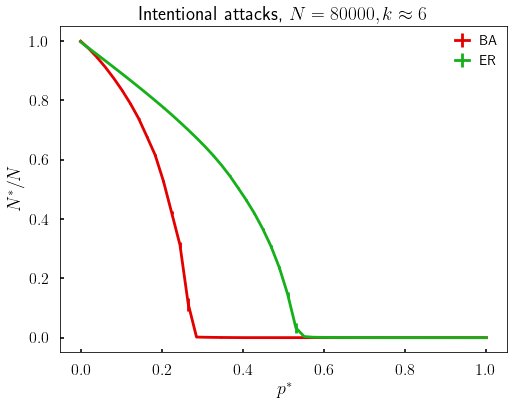

In [24]:
labels = ['BA', 'ER', 'HRG']
data = [ba_intentional_large, er_intentional_large]

plt.figure(figsize=(8, 6))
viz.plot_giant_connected_component_vs_removed(data, labels)
plt.title(r'Intentional attacks, $N=80000, k\approx 6$')
plt.show()

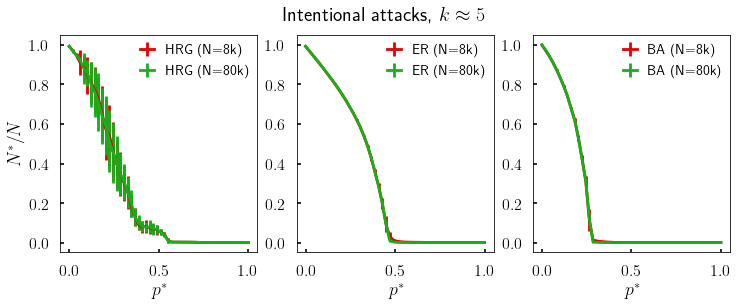

In [49]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)

labels = ['HRG (N=8k)', 'HRG (N=80k)']
data = [hrg_intentional_small, hrg_intentional_large]
viz.plot_giant_connected_component_vs_removed(data, labels)

plt.subplot(1, 3, 2)
labels = ['ER (N=8k)', 'ER (N=80k)']
data = [er_intentional_small, er_intentional_large]
viz.plot_giant_connected_component_vs_removed(data, labels, ylabel=False)

plt.subplot(1, 3, 3)
labels = ['BA (N=8k)', 'BA (N=80k)']
data = [ba_intentional_small, ba_intentional_large]
viz.plot_giant_connected_component_vs_removed(data, labels, ylabel=False)

plt.suptitle(r'Intentional attacks, $k\approx 5$', fontsize=20)

plt.show()